## Comprehensive Dividend Analysis Summary

This script evaluates the dividend efficiency of the **Kompas100** (IDX) stocks by comparing historical payouts against **current market valuations** across three distinct time horizons.

### 1. Multi-Horizon Calculation
The script calculates the average annual yield for three periods to capture both long-term stability and short-term momentum:
* **2-Year Average:** Highlights recent dividend policy changes and current trends.
* **5-Year Average:** Provides a medium-term view, smoothing out one-time anomalies.
* **10-Year Average:** Identifies historical "Dividend Kings" with long-term reliability.

### 2. Logic & Methodology
* **Latest Price Anchor:** All yields are calculated as:
    $$\text{Yield \%} = \left( \frac{\text{Total Annual Dividend}}{\text{Current Market Price}} \right) \times 100$$
    This tells you the expected return if you buy the stock at today's price.
* **Yearly Aggregation:** Automatically identifies and sums multiple payouts (Interim, Final, and Special dividends) within a single calendar year.
* **Elite Filtering:** A specific logic check identifies "Elite Performers"—stocks that rank in the **Top 10** across all three timeframes simultaneously.

### 3. Output Files
The script generates three specialized files in your environment:

| File Name | Format | Content |
| :--- | :--- | :--- |
| `comprehensive_dividend_history.csv` | CSV | Raw annual dividend totals per stock. |
| `comprehensive_yield_analysis.csv` | CSV | Full data table with Latest Price and 2Y, 5Y, and 10Y averages. |
| `dividend_report_comprehensive.txt` | TXT | **Executive Summary:** Lists the Elite Kings and Top 10 lists for each period. |

### 4. Technical Features
* **Resilience:** Uses a 5-day price lookback to handle market holidays and weekends.
* **Data Integrity:** Automatically filters out "None" values for stocks listed for less than the analysis period (e.g., a stock listed for only 3 years won't skew the 10Y Top 10 list).
* **Precision:** All values are capped at **2 decimal places** for professional reporting.

## Dependencies

In [1]:
!pip install yfinance pandas pytz

In [2]:
from datetime import datetime, timedelta
import pytz

# --- TIMEZONE ---
jakarta_tz = pytz.timezone("Asia/Jakarta")
today = jakarta_tz.localize(datetime.today())

sg = {
    # Financials (Banks & Exchange)
    "DBS": "D05.SI", "OCBC": "O39.SI", "UOB": "U11.SI",
    "SGX": "S68.SI",

    # Real Estate & REITs
    "CapitaLand Investment": "9CI.SI", "CICT": "C38.SI", "Ascendas REIT": "A17U.SI",
    "City Developments": "C09.SI", "Hongkong Land": "H78.SI", "UOL Group": "U14.SI",
    "Mapletree Pan Asia Com Tr": "N2IU.SI", "Mapletree Industrial Trust": "ME8U.SI",
    "Mapletree Logistics Trust": "M44U.SI", "Frasers Centrepoint Trust": "J69U.SI",
    "Frasers Logistics & Com Tr": "BUOU.SI", "Keppel REIT": "K71U.SI",
    "Keppel DC REIT": "AJBU.SI",

    # Industrials, Conglomerates & Transport
    "Jardine Matheson": "J36.SI", "Jardine C&C": "C07.SI", "Keppel Ltd": "BN4.SI",
    "ST Engineering": "S63.SI", "SATS": "S58.SI", "SIA": "C6L.SI",
    "Yangzijiang Shipbuilding": "BS6.SI", "Seatrium": "5E2.SI",

    # Communications & Technology
    "Singtel": "Z74.SI", "Venture Corp": "V03.SI",

    # Consumer & Healthcare
    "Thai Beverage": "Y92.SI", "Genting Singapore": "G13.SI", "DFI Retail Group": "D01.SI",
    "Wilmar International": "F34.SI", "Emperador": "EMI.SI",

    # Utilities & Energy
    "Sembcorp Industries": "U96.SI",
}

# --- 2. CONFIGURATION (Kompas100 Subset) ---
stocks = {
    # Financials (The Big 4 + Banks)
    "BBCA": "BBCA.JK", "BBRI": "BBRI.JK", "BMRI": "BMRI.JK", "BBNI": "BBNI.JK",
    "BBTN": "BBTN.JK", "BRIS": "BRIS.JK", "BDMN": "BDMN.JK", "ARTO": "ARTO.JK",
    "BJBR": "BJBR.JK", "BJTM": "BJTM.JK", "BBYB": "BBYB.JK", "PNLF": "PNLF.JK",

    # Energy & Mining (The Heavyweights)
    "ADRO": "ADRO.JK", "ITMG": "ITMG.JK", "PTBA": "PTBA.JK", "ANTM": "ANTM.JK",
    "INCO": "INCO.JK", "MEDC": "MEDC.JK", "HRUM": "HRUM.JK", "AKRA": "AKRA.JK",
    "AMMN": "AMMN.JK", "BREN": "BREN.JK", "CUAN": "CUAN.JK", "PGEO": "PGEO.JK",
    "MBMA": "MBMA.JK", "NCKL": "NCKL.JK", "ELSA": "ELSA.JK", "ENRG": "ENRG.JK",
    "TOBA": "TOBA.JK", "SGER": "SGER.JK", "AADI": "AADI.JK",

    # Consumer & Retail
    "UNVR": "UNVR.JK", "ICBP": "ICBP.JK", "INDF": "INDF.JK", "AMRT": "AMRT.JK",
    "ACES": "ACES.JK", "MYOR": "MYOR.JK", "SIDO": "SIDO.JK", "HMSP": "HMSP.JK",
    "CPIN": "CPIN.JK", "JPFA": "JPFA.JK", "ERAA": "ERAA.JK", "MAPI": "MAPI.JK",
    "MAPA": "MAPA.JK", "CMRY": "CMRY.JK",

    # Infrastructure, Tech & Telco
    "TLKM": "TLKM.JK", "ISAT": "ISAT.JK", "EXCL": "EXCL.JK", "MTEL": "MTEL.JK",
    "TOWR": "TOWR.JK", "JSMR": "JSMR.JK", "GOTO": "GOTO.JK", "BUKA": "BUKA.JK",
    "EMTK": "EMTK.JK", "SCMA": "SCMA.JK", "WIFI": "WIFI.JK", "INET": "INET.JK",

    # Basic Materials & Industrials
    "ASII": "ASII.JK", "UNTR": "UNTR.JK", "SMGR": "SMGR.JK", "INTP": "INTP.JK",
    "TPIA": "TPIA.JK", "BRPT": "BRPT.JK", "INKP": "INKP.JK", "DSSA": "DSSA.JK",
    "IMPC": "IMPC.JK", "ESSA": "ESSA.JK", "FILM": "FILM.JK",

    # Property & Healthcare
    "BSDE": "BSDE.JK", "PWON": "PWON.JK", "CTRA": "CTRA.JK", "SMRA": "SMRA.JK",
    "PANI": "PANI.JK", "HEAL": "HEAL.JK", "MIKA": "MIKA.JK", "KLBF": "KLBF.JK"
}

best_div = {
    # Financials (Banks)
    "BBRI": "BBRI.JK", "BJBR": "BJBR.JK", "BJTM": "BJTM.JK",

    # Energy & Mining (Coal & Heavy Equipment)
    "ADRO": "ADRO.JK", "ITMG": "ITMG.JK", "PTBA": "PTBA.JK",
    "UNTR": "UNTR.JK", "AADI": "AADI.JK",

    # Consumer Non-Cyclicals (Tobacco & Staples)
    "HMSP": "HMSP.JK", "UNVR": "UNVR.JK",

    # Basic Materials (Cement)
    "INTP": "INTP.JK", "SMGR": "SMGR.JK",

    # Consumer Cyclicals & Trading (Retail & Distribution)
    "ACES": "ACES.JK", "AKRA": "AKRA.JK",
}

### Sector Map

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.patches as mpatches

# 1. YOU NEED THIS MAP (Add any missing stocks here)
sector_map = {
    "DBS": "Financials", "OCBC": "Financials", "UOB": "Financials", "SGX": "Financials",
    "Singtel": "Communications", "StarHub": "Communications", "NetLink NBN": "Communications",
    "CICT": "REITs", "Ascendas REIT": "REITs", "Mapletree Log": "REITs", "Mapletree Ind": "REITs",
    "Mapletree PanAsia": "REITs", "Frasers Cpt Tr": "REITs", "Frasers L&C": "REITs", "Keppel DC REIT": "REITs",
    "Keppel Ltd": "Industrials/Utilities", "ST Engineering": "Industrials/Utilities", "SATS": "Industrials/Utilities",
    "Seatrium": "Industrials/Utilities", "Sembcorp Ind": "Industrials/Utilities", "Yangzijiang": "Industrials/Utilities",
    "CapitaLand Invest": "Real Estate", "CityDev": "Real Estate", "HK Land": "Real Estate", "UOL Group": "Real Estate",
    "SIA": "Transport", "Venture": "Technology", "Wilmar": "Consumer Staples", "ThaiBev": "Consumer Staples",
    "Genting Sing": "Consumer Discretionary", "DFI Retail": "Consumer Staples", "Jardine Math": "Conglomerates", "Jardine C&C": "Conglomerates"
}

# 2. YOU NEED THESE COLORS
sector_colors = {
    "Financials": "#1f77b4", "REITs": "#ff7f0e", "Industrials/Utilities": "#2ca02c",
    "Real Estate": "#9467bd", "Communications": "#e377c2", "Consumer Staples": "#8c564b",
    "Consumer Discretionary": "#d62728", "Transport": "#7f7f7f", "Technology": "#17becf", "Conglomerates": "#bcbd22",
    "Other": "#000000"
}


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.patches as mpatches

sector_map = {
    # Financials
    "BBCA": "Financials", "BBRI": "Financials", "BMRI": "Financials", "BBNI": "Financials",
    "BBTN": "Financials", "BRIS": "Financials", "BDMN": "Financials", "ARTO": "Financials",
    "BJBR": "Financials", "BJTM": "Financials", "BBYB": "Financials", "PNLF": "Financials",

    # Energy & Mining
    "ADRO": "Energy", "ITMG": "Energy", "PTBA": "Energy", "ANTM": "Basic Materials",
    "INCO": "Basic Materials", "MEDC": "Energy", "HRUM": "Energy", "AKRA": "Energy",
    "AMMN": "Basic Materials", "BREN": "Energy", "CUAN": "Energy", "PGEO": "Infrastructure",
    "MBMA": "Basic Materials", "NCKL": "Basic Materials", "ELSA": "Energy", "ENRG": "Energy",
    "TOBA": "Energy", "SGER": "Energy", "AADI": "Energy",

    # Consumer Non-Cyclicals (Staples)
    "UNVR": "Consumer Non-Cyclical", "ICBP": "Consumer Non-Cyclical", "INDF": "Consumer Non-Cyclical",
    "MYOR": "Consumer Non-Cyclical", "SIDO": "Healthcare", "HMSP": "Consumer Non-Cyclical",
    "CPIN": "Consumer Non-Cyclical", "JPFA": "Consumer Non-Cyclical", "CMRY": "Consumer Non-Cyclical",
    "KLBF": "Healthcare",

    # Consumer Cyclicals (Retail/Entertainment)
    "AMRT": "Consumer Cyclical", "ACES": "Consumer Cyclical", "ERAA": "Consumer Cyclical",
    "MAPI": "Consumer Cyclical", "MAPA": "Consumer Cyclical", "FILM": "Consumer Cyclical",

    # Infrastructure & Telco
    "TLKM": "Infrastructure", "ISAT": "Infrastructure", "EXCL": "Infrastructure", "MTEL": "Infrastructure",
    "TOWR": "Infrastructure", "JSMR": "Infrastructure", "WIFI": "Infrastructure", "INET": "Infrastructure",

    # Technology
    "GOTO": "Technology", "BUKA": "Technology", "EMTK": "Technology", "SCMA": "Technology",

    # Industrials & Basic Materials
    "ASII": "Industrials", "UNTR": "Industrials", "SMGR": "Basic Materials", "INTP": "Basic Materials",
    "TPIA": "Basic Materials", "BRPT": "Basic Materials", "INKP": "Basic Materials", "DSSA": "Energy",
    "IMPC": "Basic Materials", "ESSA": "Basic Materials",

    # Property & Real Estate
    "BSDE": "Property", "PWON": "Property", "CTRA": "Property", "SMRA": "Property", "PANI": "Property",

    # Healthcare
    "HEAL": "Healthcare", "MIKA": "Healthcare"
}


sector_colors = {
    "Financials": "#1f77b4",          # Deep Blue
    "Energy": "#d62728",              # Red (Energy/Oil/Coal)
    "Basic Materials": "#8c564b",     # Brown
    "Consumer Non-Cyclical": "#2ca02c", # Forest Green
    "Consumer Cyclical": "#e377c2",   # Pink
    "Infrastructure": "#ff7f0e",      # Orange (Telco/Towers)
    "Technology": "#17becf",          # Cyan/Light Blue
    "Industrials": "#7f7f7f",         # Grey
    "Property": "#9467bd",            # Purple
    "Healthcare": "#bcbd22",          # Olive Green
    "Other": "#000000"                # Black default
}

## Codes

### Best Dividend Stocks

#### Run

In [5]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pytz

# Set today's date
today = datetime.now(pytz.timezone('Asia/Singapore'))

# --- 1. HELPER FUNCTIONS ---
def ellipsize_name(name, max_len=12):
    if len(name) > max_len:
        return name[:max_len-1] + "…"
    return name

def get_drawdown_pct(current_price, high_price):
    if not current_price or not high_price or high_price <= 0:
        return "N/A"
    return round(((current_price - high_price) / high_price) * 100, 2)

def calc_avg_annual_dividend_yield(dividends_series, latest_price, period_start_date):
    if dividends_series.empty or latest_price is None or latest_price <= 0:
        return None
    filtered_dividends = dividends_series[dividends_series.index >= period_start_date]
    if filtered_dividends.empty:
        return None
    dividends_df = filtered_dividends.reset_index()
    dividends_df['Year'] = dividends_df['Date'].dt.year
    annual_sums = dividends_df.groupby('Year')['Dividends'].sum()
    annual_yields = [(div / latest_price) * 100 for div in annual_sums]
    avg_yield = sum(annual_yields) / len(annual_yields)
    return round(avg_yield, 2)

# --- 2. DATA PROCESSING ---
results_list = []

cutoff_2y = today - timedelta(days=365 * 2)
cutoff_5y = today - timedelta(days=365 * 5)
cutoff_10y = today - timedelta(days=365 * 10)

for name, symbol in stocks.items():
    clean_name = ellipsize_name(name)
    print(f"Fetching {symbol} ({clean_name})...")
    try:
        tkr = yf.Ticker(symbol)
        # Fetching 10Y of data to cover all periods
        hist_10y = tkr.history(period="10y")
        hist_1y = tkr.history(period="1y")

        if hist_10y.empty: continue

        latest_price = hist_10y['Close'].iloc[-1]

        # Calculate Period-Specific Highs
        high_2y = hist_10y[hist_10y.index >= cutoff_2y.strftime('%Y-%m-%d')]['High'].max()
        high_5y = hist_10y[hist_10y.index >= cutoff_5y.strftime('%Y-%m-%d')]['High'].max()
        high_10y = hist_10y['High'].max()
        high_1y = hist_1y['High'].max() if not hist_1y.empty else None

        divs = tkr.dividends

        results_list.append({
            "name": clean_name,
            "latest_price": round(latest_price, 2),
            "high_1y_pct": get_drawdown_pct(latest_price, high_1y),
            # Store period-specific drawdowns
            "drawdown_2y": get_drawdown_pct(latest_price, high_2y),
            "drawdown_5y": get_drawdown_pct(latest_price, high_5y),
            "drawdown_10y": get_drawdown_pct(latest_price, high_10y),
            "avg_2y": calc_avg_annual_dividend_yield(divs, latest_price, cutoff_2y),
            "avg_5y": calc_avg_annual_dividend_yield(divs, latest_price, cutoff_5y),
            "avg_10y": calc_avg_annual_dividend_yield(divs, latest_price, cutoff_10y)
        })
    except Exception as e:
        print(f"Error {symbol}: {e}")

# --- 3. LOGIC & TABLE FORMATTING ---
df_results = pd.DataFrame(results_list)

top_20_2y = df_results.dropna(subset=['avg_2y']).sort_values("avg_2y", ascending=False).head(20)
top_20_5y = df_results.dropna(subset=['avg_5y']).sort_values("avg_5y", ascending=False).head(20)
top_20_10y = df_results.dropna(subset=['avg_10y']).sort_values("avg_10y", ascending=False).head(20)

triple_overlap = df_results[
    (df_results['name'].isin(top_20_2y['name'])) &
    (df_results['name'].isin(top_20_5y['name'])) &
    (df_results['name'].isin(top_20_10y['name']))
].sort_values("avg_5y", ascending=False)

def write_table(f, title, dataframe, yield_col=None, drawdown_col="drawdown_10y"):
    f.write(f"\n--- {title} ---\n")
    # Determine the label for the drawdown column
    dd_label = "2Y HIGH%" if "2y" in drawdown_col else "5Y HIGH%" if "5y" in drawdown_col else "10Y HIGH%"

    header = f"{'NAME':<12} | "
    if yield_col:
        header += f"{'YIELD':<8} | "
    else:
        header += f"{'2Y%':<6} | {'5Y%':<6} | {'10Y%':<6} | "

    header += f"{'PRICE':<8} | {dd_label:<10} | {'1Y HIGH %':<10}\n"
    f.write(header)
    f.write("-" * 95 + "\n")

    for _, row in dataframe.iterrows():
        row_str = f"{row['name']:<12} | "
        if yield_col:
            row_str += f"{row[yield_col]:>6.2f}% | "
        else:
            row_str += f"{row['avg_2y']:>5.1f}% | {row['avg_5y']:>5.1f}% | {row['avg_10y']:>5.1f}% | "

        row_str += f"{row['latest_price']:>8.2f} | {str(row[drawdown_col])+'%':>10} | {str(row['high_1y_pct'])+'%':>10}\n"
        f.write(row_str)

# --- 4. FILE SAVING ---
with open("dividend_report_final.txt", "w", encoding="utf-8") as f:
    f.write(f"STI COMPREHENSIVE PERFORMANCE REPORT ({today.strftime('%Y-%m-%d')})\n")
    f.write("="*95 + "\n")

    if not triple_overlap.empty:
        # For Elite, we default to showing the 10Y High drawdown
        write_table(f, "👑 ELITE PERFORMERS (Top 20 in 2Y, 5Y, & 10Y)", triple_overlap, drawdown_col="drawdown_10y")
    else:
        f.write("\n👑 ELITE PERFORMERS: No stocks qualified.\n")

    write_table(f, "TOP 20 - 2 YEAR AVG YIELD", top_20_2y, 'avg_2y', "drawdown_2y")
    write_table(f, "TOP 20 - 5 YEAR AVG YIELD", top_20_5y, 'avg_5y', "drawdown_5y")
    write_table(f, "TOP 20 - 10 YEAR AVG YIELD", top_20_10y, 'avg_10y', "drawdown_10y")

print("\n--- Final report saved to dividend_report_final.txt ---")

Fetching BBCA.JK (BBCA)...
Fetching BBRI.JK (BBRI)...
Fetching BMRI.JK (BMRI)...
Fetching BBNI.JK (BBNI)...
Fetching BBTN.JK (BBTN)...
Fetching BRIS.JK (BRIS)...
Fetching BDMN.JK (BDMN)...
Fetching ARTO.JK (ARTO)...
Fetching BJBR.JK (BJBR)...
Fetching BJTM.JK (BJTM)...
Fetching BBYB.JK (BBYB)...
Fetching PNLF.JK (PNLF)...
Fetching ADRO.JK (ADRO)...
Fetching ITMG.JK (ITMG)...
Fetching PTBA.JK (PTBA)...
Fetching ANTM.JK (ANTM)...
Fetching INCO.JK (INCO)...
Fetching MEDC.JK (MEDC)...
Fetching HRUM.JK (HRUM)...
Fetching AKRA.JK (AKRA)...
Fetching AMMN.JK (AMMN)...
Fetching BREN.JK (BREN)...
Fetching CUAN.JK (CUAN)...
Fetching PGEO.JK (PGEO)...
Fetching MBMA.JK (MBMA)...
Fetching NCKL.JK (NCKL)...
Fetching ELSA.JK (ELSA)...
Fetching ENRG.JK (ENRG)...
Fetching TOBA.JK (TOBA)...
Fetching SGER.JK (SGER)...
Fetching AADI.JK (AADI)...
Fetching UNVR.JK (UNVR)...
Fetching ICBP.JK (ICBP)...
Fetching INDF.JK (INDF)...
Fetching AMRT.JK (AMRT)...
Fetching ACES.JK (ACES)...
Fetching MYOR.JK (MYOR)...
F

##### Table

In [6]:
from IPython.display import display, HTML

def display_styled_table(df, title, yield_col):
    """Helper function to style and display tables."""
    if df.empty:
        print(f"\nNo data available for {title}")
        return

    # Define columns to show based on whether it's Elite or a specific category
    cols = ['name', 'latest_price', 'ath_pct', 'high_1y_pct']
    if yield_col == 'all':
        cols = ['name', 'avg_2y', 'avg_5y', 'avg_10y'] + cols[1:]
        gradient_cols = ['avg_2y', 'avg_5y', 'avg_10y']
    else:
        cols = ['name', yield_col] + cols[1:]
        gradient_cols = [yield_col]

    # Styling logic
    def highlight_below_20(val):
        if isinstance(val, (int, float)) and val <= -20:
            return 'background-color: #ffcccc; color: #cc0000; font-weight: bold'
        return ''

    styled_df = df[cols].style \
        .background_gradient(subset=gradient_cols, cmap='YlGn') \
        .applymap(highlight_below_20, subset=['ath_pct', 'high_1y_pct']) \
        .format({
            'latest_price': '${:.2f}',
            'avg_2y': '{:.2f}%', 'avg_5y': '{:.2f}%', 'avg_10y': '{:.2f}%',
            'ath_pct': '{:.1f}%', 'high_1y_pct': '{:.1f}%'
        }) \
        .set_caption(f"<b>{title}</b>") \
        .set_properties(**{'text-align': 'center', 'padding': '8px'})

    display(styled_df)

# --- Display All Categories ---
print("📊 STI DIVIDEND DASHBOARD")
display_styled_table(triple_overlap, "👑 ELITE PERFORMERS", 'all')
display_styled_table(top_20_2y, "📈 TOP 20 - 2 YEAR AVG YIELD", 'avg_2y')
display_styled_table(top_20_5y, "📈 TOP 20 - 5 YEAR AVG YIELD", 'avg_5y')
display_styled_table(top_20_10y, "📈 TOP 20 - 10 YEAR AVG YIELD", 'avg_10y')

📊 STI DIVIDEND DASHBOARD


KeyError: "['ath_pct'] not in index"

##### Chart

/tmp/ipython-input-1622633861.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yield_col, y='name', data=df, palette='Greens_r', ax=ax, alpha=0.8)
/tmp/ipython-input-1622633861.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yield_col, y='name', data=df, palette='Greens_r', ax=ax, alpha=0.8)
/tmp/ipython-input-1622633861.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yield_col, y='name', data=df, palette='Greens_r', ax=ax, alpha=0.8)
/tmp/ipython-input-1622633861.py:9: FutureWarning: 

Passing `palette` without assigning `h

✅ Success! Chart saved as: IDX_Performance_Report_20260201.png


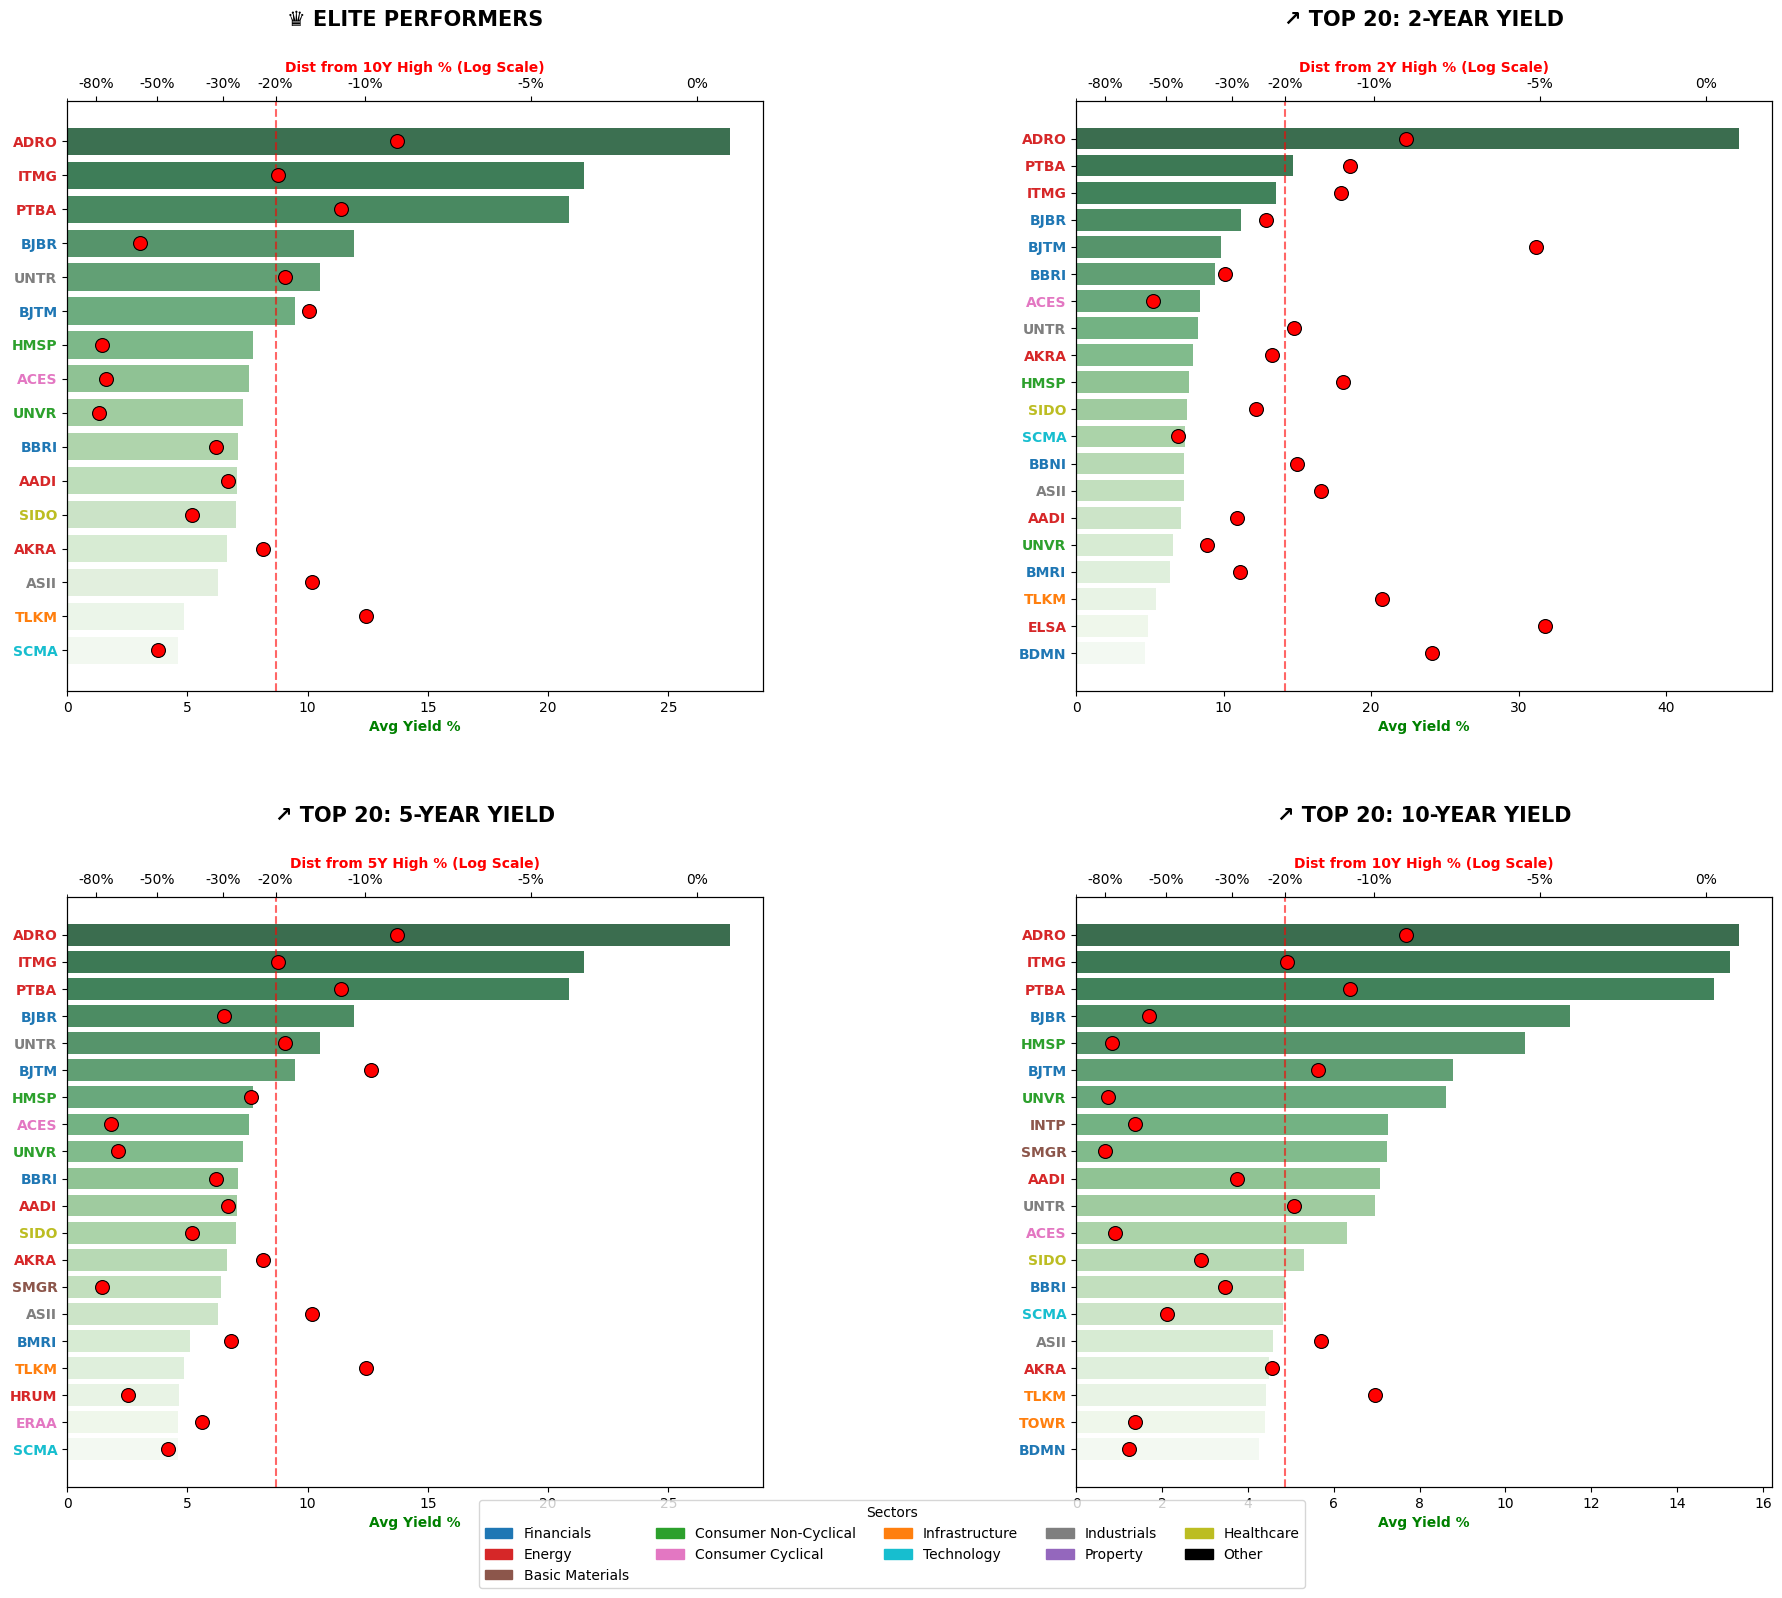

In [7]:
filename = f"IDX_Performance_Report_{today.strftime('%Y%m%d')}.png"

def plot_final_chart(df, yield_col, drawdown_col, title, ax):
    if df.empty:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center')
        return

    # --- 1. PRIMARY AXIS: Green Bars ---
    sns.barplot(x=yield_col, y='name', data=df, palette='Greens_r', ax=ax, alpha=0.8)
    ax.set_title(title, fontsize=15, fontweight='bold', pad=25)
    ax.set_xlabel('Avg Yield %', color='green', fontweight='bold')
    ax.set_ylabel('')

    # --- 2. SECONDARY AXIS: Red Dots & Log Scale ---
    ax2 = ax.twiny()
    # UPDATED: x now uses the drawdown_col variable
    sns.scatterplot(x=drawdown_col, y='name', data=df, color='red', s=100, edgecolor='black', zorder=5, ax=ax2)

    # Log Scale for Drawdown
    ax2.set_xscale('symlog', linthresh=10)
    ticks = [0, -5, -10, -20, -30, -50, -80]
    ax2.set_xlim(-100, 2)
    ax2.xaxis.set_major_locator(FixedLocator(ticks))
    ax2.xaxis.set_major_formatter(FixedFormatter([f"{t}%" for t in ticks]))

    # Dashed Line at -20%
    ax2.axvline(-20, color='red', linestyle='--', linewidth=1.5, alpha=0.6)

    # Dynamic Label for the top X-axis
    period_label = drawdown_col.split('_')[1].upper() # Extracts '2Y', '5Y', etc.
    ax2.set_xlabel(f'Dist from {period_label} High % (Log Scale)', color='red', fontweight='bold')

    # --- 3. COLOR CODE Y-AXIS NAMES BY SECTOR ---
    ylabels = ax.get_yticklabels()
    for label in ylabels:
        name_text = label.get_text().replace('…', '')
        match = next((s for s in sector_map if s.startswith(name_text)), None)
        sector = sector_map.get(match, "Other")
        label.set_color(sector_colors.get(sector, "black"))
        label.set_weight('bold')

# --- Generate 2x2 Grid with Correct Column References ---
fig, axes = plt.subplots(2, 2, figsize=(22, 18))
plt.subplots_adjust(wspace=0.45, hspace=0.35)

# Pass the specific drawdown column for each plot
plot_final_chart(triple_overlap, 'avg_5y', 'drawdown_10y', "\u265B ELITE PERFORMERS", axes[0,0])
plot_final_chart(top_20_2y, 'avg_2y', 'drawdown_2y', "\u2197 TOP 20: 2-YEAR YIELD", axes[0,1])
plot_final_chart(top_20_5y, 'avg_5y', 'drawdown_5y', "\u2197 TOP 20: 5-YEAR YIELD", axes[1,0])
plot_final_chart(top_20_10y, 'avg_10y', 'drawdown_10y', "\u2197 TOP 20: 10-YEAR YIELD", axes[1,1])

# --- Sector Legend ---
legend_patches = [mpatches.Patch(color=color, label=sector) for sector, color in sector_colors.items()]
fig.legend(handles=legend_patches, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0.05), title="Sectors")

# Save and Show
plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Success! Chart saved as: {filename}")
plt.show()

### Find Upcoming Dividend

#### Config

In [ ]:

DATE_FROM = "2025-02-01"
DATE_TO   = "2025-02-28"

COOKIES = {
    "PHPSESSID": "2i078qpresf9tn6v6pc874ni9q",
    "geoC": "SG",
    "invab": "adsdesign_0|invchaltnb_0|navbarctac_1",
    "cf_clearance": "sq9eQV2K_bIGfdncTdpUtF2heJLJLCHnlRrxkZpIiNU-1769841589-1.2.1.1",
}

URL = "https://id.investing.com/dividends-calendar/Service/getCalendarFilteredData"

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:147.0) Gecko/20100101 Firefox/147.0",
    "Accept": "*/*",
    "Accept-Language": "en-US,en;q=0.9",
    "Content-Type": "application/x-www-form-urlencoded",
    "X-Requested-With": "XMLHttpRequest",
    "Origin": "https://id.investing.com",
    "Referer": "https://id.investing.com/dividends-calendar/",
    "DNT": "1",
    "Connection": "keep-alive",
}

PAYLOAD = {
    'country[]': 48, # Assuming COUNTRY_ID = 48 for Indonesia
    'dateFrom': DATE_FROM,
    'dateTo': DATE_TO,
    'currentTab': 'custom',
    'limit_from': 0
}

THIS_WEEK_PAYLOAD = {
    'country[]': 48,
    'currentTab': 'thisWeek',
    'limit_from': 0
}

NEXT_WEEK_PAYLOAD = {
    'country[]': 48,
    'currentTab': 'nextWeek',
    'limit_from': 0
}


# Combine base HEADERS with COOKIES
HEADERS_WITH_COOKIES = HEADERS.copy()
HEADERS_WITH_COOKIES['Cookie'] = '; '.join([f'{k}={v}' for k, v in COOKIES.items()])

# --- SETTINGS ---
# Change this to: PAYLOAD, NEXT_WEEK_PAYLOAD, or THIS_WEEK_PAYLOAD
ACTIVE_PAYLOAD = NEXT_WEEK_PAYLOAD
# ----------------


#### Function

In [ ]:
import requests

if ACTIVE_PAYLOAD == PAYLOAD:
    print(f"Fetching dividend data from {DATE_FROM} to {DATE_TO}...")
else:
    print("Fetching dividend data for selected preset...")

try:
    # We use ACTIVE_PAYLOAD here so it reflects your choice above
    response = requests.post(URL, headers=HEADERS_WITH_COOKIES, data=ACTIVE_PAYLOAD)
    response.raise_for_status()
    json_data = response.json()
    print("Data fetched successfully!")

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    json_data = {"data": "", "rows_num": 0}

print(f"Fetched rows_num: {json_data.get('rows_num', 'N/A')}")

In [ ]:
import json
import csv
from bs4 import BeautifulSoup
from datetime import datetime

# ======================
# INPUT (paste JSON here)
# ======================
# Use the fetched json_data instead of hardcoded raw_json
raw_json = json_data

# ======================
# PARSE HTML
# ======================
soup = BeautifulSoup(raw_json["data"], "html.parser")

rows = soup.select("tr")

results = []
current_day = None

for row in rows:
    # Handle date divider rows
    if row.has_attr("tablesorterdivider"):
        day_cell = row.select_one(".theDay")
        if day_cell:
            current_day = day_cell.get_text(strip=True)
        continue

    cols = row.select("td")
    if len(cols) < 7:
        continue

    # Extract company + ticker
    company_cell = cols[1]
    company_name = company_cell.select_one(".earnCalCompanyName").get_text(strip=True)
    ticker = company_cell.select_one("a.bold").get_text(strip=True)

    # Extract values
    ex_date = cols[2].get_text(strip=True)
    dividend = cols[3].get_text(strip=True)
    div_type = cols[4].select_one("span")["title"]
    pay_date = cols[5].get_text(strip=True)
    yield_pct = cols[6].get_text(strip=True)

    # Normalize numbers
    def to_float(val):
        if not val or val == "-":
            return None
        return float(val.replace(".", "").replace(",", "."))

    results.append({
        "calendar_day": current_day,
        "company": company_name,
        "ticker": ticker,
        "ex_date": ex_date,
        "dividend": to_float(dividend),
        "dividend_type": div_type,
        "payment_date": pay_date,
        "yield_percent": to_float(yield_pct.replace("%", "")),
    })

# ======================
# SAVE TO CSV
# ======================
filename = f"id_dividends_{raw_json['dateFrom']}_to_{raw_json['dateTo']}.csv"

# Check if results is empty before trying to access results[0].keys()
if results:
    with open(filename, "w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=results[0].keys())
        writer.writeheader()
        writer.writerows(results)
    print(f"Saved {len(results)} rows to {filename}")
else:
    print("No dividend data to save.")

results[:5]
